**Configuración de GPU**

In [1]:
import torch

# Verificar si PyTorch está usando la GPU
print("Versión de PyTorch:", torch.__version__)
print("CUDA disponible:", torch.cuda.is_available())
print("Cantidad de GPUs disponibles:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("Nombre de la GPU:", torch.cuda.get_device_name(0))


if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

    # Configurar para usar la GPU de manera eficiente
    # PyTorch usa la GPU por defecto si está disponible.
    # Puedes mover tensores y modelos a la GPU explícitamente.

Versión de PyTorch: 2.8.0+cu126
CUDA disponible: True
Cantidad de GPUs disponibles: 1
Nombre de la GPU: NVIDIA A100-SXM4-80GB


**Extracción de Dataset en Colab**

In [2]:
import tarfile
import os

#Ruta al archivo comprimido
dog_tar_path = '/content/drive/MyDrive/PetFace/images/dog.tar.gz'

#Carpeta temporal para extraer
extract_path = '/content/'

#Crea la carpeta si no existe
os.makedirs(extract_path, exist_ok=True)

#Extraer de forma segura
with tarfile.open(dog_tar_path, 'r:gz') as tar:
    tar.extractall(path=extract_path, filter='data')

print("Archivos extraídos en:", extract_path)

Archivos extraídos en: /content/


**Explorar Dataset**

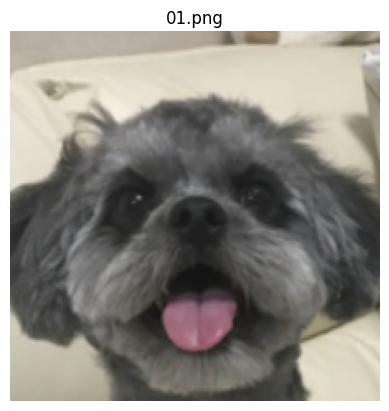

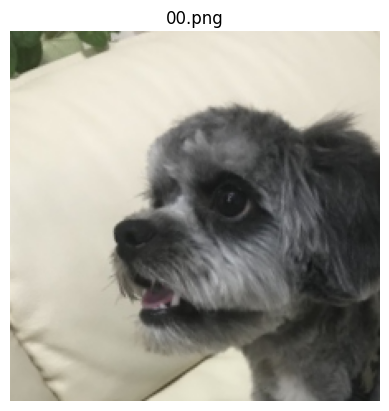

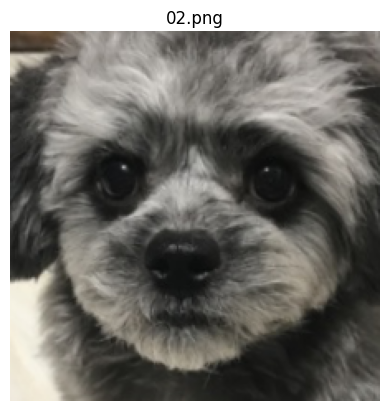

In [3]:
import matplotlib.pyplot as plt
import random
from PIL import Image

#Carpeta con las imágenes descomprimidas
img_folder = '/content/dog'

#Explorar subcarpetas (cada una representa un individuo)
subfolders = [f.path for f in os.scandir(img_folder) if f.is_dir()]
if not subfolders:
    print("No se encontraron subcarpetas dentro de", img_folder)
else:
    #Elegir una subcarpeta al azar
    random_subfolder = random.choice(subfolders)

    #Listar imágenes dentro de esa subcarpeta
    images = [os.path.join(random_subfolder, f) for f in os.listdir(random_subfolder) if f.endswith('.png')]

    if not images:
        print("No se encontraron imágenes dentro de la subcarpeta:", random_subfolder)
    else:
        #Elegir imágenes aleatorias
        random_images = random.sample(images, min(5, len(images)))

        #Mostrar imágenes
        for img_path in random_images:
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.title(os.path.basename(img_path))
            plt.axis('off')

In [ ]:
import numpy as np

print(img_folder)

assert os.path.isdir(img_folder), '[Error] Provided PATH for dataset does not exist.'

print('Loading the dataset...')

filenames = np.empty(0)
labels = np.empty(0)
idx = 0
for root,dirs,files in os.walk(img_folder):
    if len(files)>1:
        for i in range(len(files)):
            files[i] = root + '/' + files[i]
        filenames = np.append(filenames,files)
        labels = np.append(labels,np.ones(len(files))*idx)
        idx += 1
assert len(labels)!=0, '[Error] No data provided.'

print('Done.')

print('Total number of imported pictures: {:d}'.format(len(labels)))

nbof_classes = len(np.unique(labels))
print('Total number of classes: {:d}'.format(nbof_classes))

/content/dog
Loading the dataset...
Done.
Total number of imported pictures: 275068
Total number of classes: 71613


**Modelo MegaDescriptor**

In [ ]:
import timm
import torch
import torchvision.transforms as T

from PIL import Image

# Carga el modelo directamente desde el Hub de Hugging Face
# El modelo se descargará automáticamente
model = timm.create_model(
    'hf_hub:BVRA/MegaDescriptor-L-384', # Nombre del repositorio en el Hub
    pretrained=True
)

# Poner el modelo en modo de evaluación (importante para inferencia)
model.eval()

train_transforms = T.Compose([T.Resize(size=(384, 384)),
                              T.ToTensor(),
                              T.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

print("Modelo cargado exitosamente.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

Modelo cargado exitosamente.


**Prueba DINO**

In [4]:
!pip install lightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.6/165.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 63.0 MB/s eta 0:00:00


In [5]:
import copy
from functools import partial

In [7]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

def freeze_eval_module(module: Module) -> None:
    """Freeze the parameters of a module."""
    for param in module.parameters():
        param.requires_grad = False
    module.eval()

NameError: name 'Module' is not defined

In [10]:
import lightly.data
# 2.3 - Definir el Dataset (apuntando a tu carpeta)
path_dir = "/content/dog" # <--- ¡Asegúrate que esta sea tu ruta!
try:
    dataset = lightly.data.LightlyDataset(
        input_dir=path_dir
    )
    print(f"Dataset cargado: {len(dataset)} imágenes encontradas en {path_dir}")
except FileNotFoundError:
    print(f"Error: Carpeta '{path_dir}' no encontrada.")
    print("Asegúrate de descomprimir tu dataset primero (Celda 4 de tu notebook TBase1.ipynb).")
    # Salir o manejar el error apropiadamente si esto fuera un script .py
    # exit()

Dataset cargado: 275068 imágenes encontradas en /content/dog


In [ ]:
import copy
import torch
import torchvision
from torch import nn
from torch.optim import AdamW
from torch.utils.data import DataLoader

import lightly.data
from lightly.data.collate import DINOCollateFunction
from lightly.loss import DINOLoss
from lightly.models.modules import DINOProjectionHead
from lightly.utils.scheduler import cosine_schedule, linear_warmup_schedule
from lightly.models.utils import update_momentum
import os

# --- 1. Parámetros de Entrenamiento ---
# ⚠️ BATCH_SIZE: 64 debería funcionar bien en una T4/V100 con ResNet-50
# Súbelo a 128 o 256 si tienes una A100 (40GB)
BATCH_SIZE = 256
NUM_WORKERS = 8
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
EPOCHS = 20 # 20 épocas para esta prueba
LR = 0.001
N_LOCAL_VIEWS = 8 # ResNet es rápido, podemos usar 8
DATASET_PATH = "/content/dog"

print(f"Usando device: {DEVICE}, Batch size: {BATCH_SIZE}")

# --- 2. Modelo (Student y Teacher con ResNet-50) ---

weights = torchvision.models.ResNet50_Weights.IMAGENET1K_V1
backbone = torchvision.models.resnet50(weights=weights)
# Obtenemos la dimensión de salida (2048)
backbone_dim = backbone.fc.in_features
# Reemplazamos la capa de clasificación
backbone.fc = nn.Identity()

# Definimos el DINOProjectionHead (más ligero que el de DINOv2)
model_head = DINOProjectionHead(
    input_dim=backbone_dim,
    hidden_dim=2048,
    output_dim=8192 # Un output_dim estándar para DINO
)

# Definimos los argumentos para nuestra cabeza de proyección
head_args = {
    "input_dim": backbone_dim,
    "hidden_dim": 2048,
    "output_dim": 8192
}

# 1. Crear el backbone del student y del teacher
student_backbone = backbone.to(DEVICE)
teacher_backbone = copy.deepcopy(backbone).to(DEVICE) # deepcopy está bien para ResNet

# 2. Crear la cabeza del student
student_head = DINOProjectionHead(**head_args).to(DEVICE)

# 3. Crear una NUEVA instancia de la cabeza del teacher
teacher_head = DINOProjectionHead(**head_args)

# 4. Copiar los pesos (state_dict) del student al teacher
teacher_head.load_state_dict(student_head.state_dict())

# 5. Mover el teacher a la GPU
teacher_head = teacher_head.to(DEVICE)

# Congelamos el teacher
for param in teacher_backbone.parameters():
    param.requires_grad = False
for param in teacher_head.parameters():
    param.requires_grad = False

# --- 3. Dataloader ---
collate_fn = DINOCollateFunction(
    global_crop_size=224,
    local_crop_size=96,
    n_local_views=N_LOCAL_VIEWS,
)

if not os.path.exists(DATASET_PATH):
    print(f"Error: Carpeta '{DATASET_PATH}' no encontrada.")
else:
    dataset = lightly.data.LightlyDataset(input_dir=DATASET_PATH)
    print(f"Dataset cargado: {len(dataset)} imágenes encontradas.")

    dataloader = DataLoader(
        dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        drop_last=True,
        num_workers=NUM_WORKERS,
        collate_fn=collate_fn,
        pin_memory=True,
        persistent_workers=True
    )

    # --- 4. Pérdida, Optimizador, AMP ---
    criterion = DINOLoss(
        output_dim=8192,
        warmup_teacher_temp_epochs=5
    ).to(DEVICE)

    params_student = list(student_backbone.parameters()) + list(student_head.parameters())
    optimizer = AdamW(params_student, lr=LR)

    scaler = torch.amp.GradScaler() # AMP
    num_batches = len(dataloader)
    total_steps = EPOCHS * num_batches
    momentum_scheduler = cosine_schedule(0, EPOCHS, 0.996, 1.0)

    # --- 5. 🚀 Loop de Entrenamiento (Corregido) ---
print(f"Iniciando entrenamiento con ResNet-50 ({num_batches} steps por epoch)")

for epoch in range(EPOCHS):
    total_loss = 0.0

    # ⚠️ NO calculamos momentum aquí fuera del loop

    for batch_idx, (views, _, _) in enumerate(dataloader):

        # --- CAMBIO 1: Calcular momentum y step global AQUÍ ---
        global_step = epoch * num_batches + batch_idx
        m = cosine_schedule(
            step=global_step,
            max_steps=total_steps,
            start_value=0.996,
            end_value=1.0
        )
        # ---------------------------------------------------

        views = [v.to(DEVICE) for v in views]
        global_views = views[:2]
        local_views = views[2:]

        with torch.amp.autocast(device_type='cuda'):
            # Teacher (sin gradientes)
            teacher_out = []
            with torch.no_grad():
                for v in global_views:
                    features = teacher_backbone(v)
                    out = teacher_head(features)
                    teacher_out.append(out)

            # Student (con gradientes)
            student_out = []
            for v in global_views + local_views:
                features = student_backbone(v)
                out = student_head(features)
                student_out.append(out)

            # Loss
            loss = criterion(teacher_out, student_out, epoch=epoch)

        # Backward
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

        # --- CAMBIO 2: Mover la actualización del Teacher AQUÍ (al final del step) ---
        update_momentum(student_backbone, teacher_backbone, m=m)
        update_momentum(student_head, teacher_head, m=m)
        # -----------------------------------------------------------------

        if (batch_idx + 1) % 100 == 0 or batch_idx == 0:
            # Añadimos 'm' al log para ver cómo cambia
            print(f"  Epoch: {epoch:>02}/{EPOCHS} | Step: {batch_idx+1:>5}/{num_batches} | Loss: {loss.item():.5f} | Momentum: {m:.4f}")

    avg_loss = total_loss / num_batches
    print(f"--- EPOCH {epoch:>02} COMPLETE --- Avg Loss: {avg_loss:.5f} ---")

print("Entrenamiento de prueba (ResNet-50) finalizado.")
torch.save(student_backbone.state_dict(), 'dino_resnet50_petface_backbone.pth')
print("Modelo backbone guardado en 'dino_resnet50_petface_backbone.pth'")

Usando device: cuda, Batch size: 256
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 237MB/s]
/usr/local/lib/python3.12/dist-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Dataset cargado: 275068 imágenes encontradas.
Iniciando entrenamiento con ResNet-50 (1074 steps por epoch)
  Epoch: 00/20 | Step:     1/1074 | Loss: 8.57552 | Momentum: 0.9960
  Epoch: 00/20 | Step:   100/1074 | Loss: 9.00781 | Momentum: 0.9960
  Epoch: 00/20 | Step:   200/1074 | Loss: 9.00000 | Momentum: 0.9960
  Epoch: 00/20 | Step:   300/1074 | Loss: 8.97917 | Momentum: 0.9960
  Epoch: 00/20 | Step:   400/1074 | Loss: 8.92622 | Momentum: 0.9960
  Epoch: 00/20 | Step:   500/1074 | Loss: 8.79688 | Momentum: 0.9960
  Epoch: 00/20 | Step:   600/1074 | Loss: 8.41884 | Momentum: 0.9960
  Epoch: 00/20 | Step:   700/1074 | Loss: 7.64996 | Momentum: 0.9960
  Epoch: 00/20 | Step:   800/1074 | Loss: 6.82205 | Momentum: 0.9960
  Epoch: 00/20 | Step:   900/1074 | Loss: 6.32335 | Momentum: 0.9960
  Epoch: 00/20 | Step:  1000/1074 | Loss: 5.80729 | Momentum: 0.9960
--- EPOCH 00 COMPLETE --- Avg Loss: 7.97027 ---
  Epoch: 01/20 | Step:     1/1074 | Loss: 5.58116 | Momentum: 0.9960
  Epoch: 01/20 | 

**Evaluación**

In [13]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from torchvision import models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
import random

# Configuración
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BACKBONE_PATH = "/content/drive/MyDrive/Backbones/dino_resnet50_petface_backbone.pth"
CSV_PATH = "/content/drive/MyDrive/PetFace/split/dog/reidentification.csv"

# Leer CSV y crear split
df = pd.read_csv(CSV_PATH)
if not {"filename", "label"}.issubset(df.columns):
    raise ValueError("El CSV debe contener las columnas: filename,label")

print(f"📁 Total de imágenes: {len(df)} | Individuos: {df['label'].nunique()}")

# Crear columnas de split: 1 query por clase
splits = []
for label, group in df.groupby("label"):
    paths = group["filename"].tolist()
    if len(paths) < 2:
        for _ in paths:
            splits.append("gallery")
    else:
        q = random.choice(paths)
        for p in paths:
            splits.append("query" if p == q else "gallery")
df["split"] = splits

print(f"📊 Generado split automático: {df['split'].value_counts().to_dict()}")

# Caegar Modelo
print("🔹 Cargando modelo DINO-ResNet50...")
model = models.resnet50(weights=None)
model.fc = nn.Identity()
model.load_state_dict(torch.load(BACKBONE_PATH, map_location=DEVICE))
model.eval().to(DEVICE)
print("✅ Modelo cargado correctamente.")

# Transformaciones
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
])

# dataset y dataloader
class DogDataset(Dataset):
    def __init__(self, df, transform):
        self.paths = df["filename"].tolist()
        self.labels = df["label"].tolist()
        self.transform = transform
    def __len__(self):
        return len(self.paths)
    def __getitem__(self, idx):
        path = self.paths[idx]
        if not os.path.exists(path):
            raise FileNotFoundError(f"No se encontró la imagen: {path}")
        img = Image.open(path).convert("RGB")
        return self.transform(img), self.labels[idx]

dataset = DogDataset(df, transform)
loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=8)

# Extraer Embeddings
print("🔹 Extrayendo embeddings...")
embeddings, labels = [], []
with torch.no_grad():
    for imgs, labs in tqdm(loader):
        imgs = imgs.to(DEVICE)
        feats = model(imgs)
        feats = nn.functional.normalize(feats, dim=1)
        embeddings.append(feats.cpu().numpy())
        labels.extend(labs)
embeddings = np.vstack(embeddings)
labels = np.array(labels)
print(f"✅ Embeddings generados: {embeddings.shape}")

# ============================
# 7️⃣ SEPARAR QUERY / GALLERY
# ============================
query_mask = df["split"] == "query"
gallery_mask = df["split"] == "gallery"

query_emb = embeddings[query_mask]
gallery_emb = embeddings[gallery_mask]
query_labels = labels[query_mask]
gallery_labels = labels[gallery_mask]

print(f"📂 Query: {len(query_emb)} | Gallery: {len(gallery_emb)}")

# CALCULAR SIMILITUD
print("🔹 Calculando matriz de similitud...")
sim_matrix = cosine_similarity(query_emb, gallery_emb)

# FUNCIÓN mAP
def average_precision(sim_row, query_label, gallery_labels):
    sorted_idx = np.argsort(-sim_row)
    sorted_labels = gallery_labels[sorted_idx]
    correct = (sorted_labels == query_label).astype(int)
    cum_correct = np.cumsum(correct)
    precision = cum_correct / (np.arange(len(correct)) + 1)
    return np.sum(precision * correct) / max(np.sum(correct), 1)

print("🔹 Calculando mAP...")
mAP = np.mean([
    average_precision(sim_matrix[i], query_labels[i], gallery_labels)
    for i in range(len(query_emb))
])

# k-NN Accuracy (Top-1)
knn = KNeighborsClassifier(n_neighbors=200, metric="cosine")
knn.fit(gallery_emb, gallery_labels)
acc = knn.score(query_emb, query_labels)

# RESULTADOS
print("\n📊 RESULTADOS DE RE-IDENTIFICACIÓN SSL")
print(f"mean Average Precision (mAP): {mAP:.4f}")
print(f"k-NN Top-1 Accuracy (k=200): {acc:.4f}")
print("✅ Evaluación completada con éxito.")


📁 Total de imágenes: 46755 | Individuos: 46755
📊 Generado split automático: {'gallery': 46755}
🔹 Cargando modelo DINO-ResNet50...
✅ Modelo cargado correctamente.
🔹 Extrayendo embeddings...


100%|██████████| 731/731 [00:36<00:00, 20.18it/s]


✅ Embeddings generados: (46755, 2048)
📂 Query: 0 | Gallery: 46755
🔹 Calculando matriz de similitud...


ValueError: Found array with 0 sample(s) (shape=(0, 2048)) while a minimum of 1 is required by check_pairwise_arrays.